In [20]:
import pandas as pd

df = pd.read_csv('Medical_Insurance_dataset.csv')

In [21]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [22]:
df.loc[df['sex']=='male','sex']=0
df.loc[df['sex']=='female','sex']=1
df['sex'] = df['sex'].astype('int32')

In [23]:
df.loc[df['smoker']=='no','smoker']=0
df.loc[df['smoker']=='yes','smoker']=1
df['smoker'] = df['smoker'].astype('int32')

In [24]:
df = pd.get_dummies(df)

In [25]:
df.head()

,age,sex,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,21.000000,0,25.745000,0,2,3279.868550,1,0,0,0
1,36.976978,1,25.744165,1,3,21454.494239,0,0,1,0
2,18.000000,0,30.030000,0,1,1720.353700,0,0,1,0
3,37.000000,0,30.676891,0,3,6801.437542,1,0,0,0
4,58.000000,0,32.010000,0,1,11946.625900,0,0,1,0


In [26]:
features = df[df.keys().drop('charges')].values
outcome = df['charges'].values

In [27]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(features,outcome,random_state=42)

In [28]:
from sklearn.preprocessing import MinMaxScaler

feature_scaler = MinMaxScaler()
train_features_scaled = feature_scaler.fit_transform(train_features)
test_features_scaled = feature_scaler.transform(test_features)

In [29]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(train_features_scaled, train_target)

KNeighborsRegressor()

In [30]:
y_pred = knn.predict(test_features_scaled)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

print("MAE :",mean_absolute_error(test_target, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(test_target, y_pred)))

MAE : 2116.379833072953
RMSE : 4339.148493303896


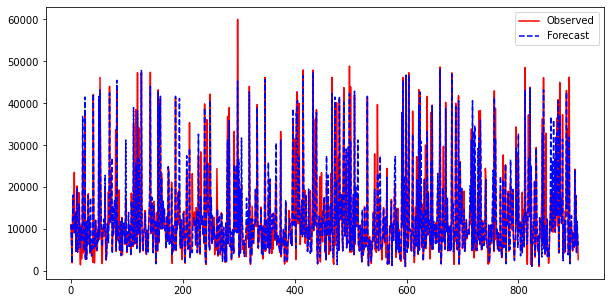

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(test_target,linestyle='-',color='red',label='Observed')
plt.plot(y_pred,linestyle='--',color='blue',label='Forecast')
plt.legend()
plt.show()